In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_test=x_test.reshape(-1,784)
x_train=x_train.reshape(-1, 784)

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(units=64, activation='relu',input_shape= (784, )))
model.add(Dense(units= 64, activation='relu'))
model.add(Dense(units= 128, activation='relu'))
model.add(Dense(units= 64, activation='relu'))
model.add(Dense(units= 10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 71,626
Trainable params: 71,626
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model compilation
model.compile(optimizer="adam", loss='categorical_crossentropy',metrics=['accuracy'] ) #Adam optimiser optimise the loss function....kind of Gradient Descent


In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
from keras.utils import to_categorical


In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train=to_categorical(y_train)
y_train.shape

(60000, 10)

In [ ]:
y_test=to_categorical(y_test)
y_test.shape

(10000, 10)

In [ ]:
hist=model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.7544 - accuracy: 0.8424 - val_loss: 0.2525 - val_accuracy: 0.9294
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2350 - accuracy: 0.9349 - val_loss: 0.2343 - val_accuracy: 0.9348
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1842 - accuracy: 0.9481 - val_loss: 0.1649 - val_accuracy: 0.9523
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1540 - accuracy: 0.9565 - val_loss: 0.1613 - val_accuracy: 0.9552
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1286 - accuracy: 0.9632 - val_loss: 0.1582 - val_accuracy: 0.9553
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1185 - accuracy: 0.9668 - val_loss: 0.1523 - val_accuracy: 0.9619
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1093 - accuracy: 0.9675 - val_loss: 0.1537 - val_accuracy:

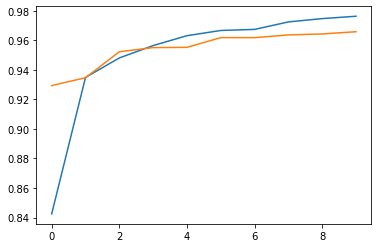

In [ ]:
history=hist.history
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])

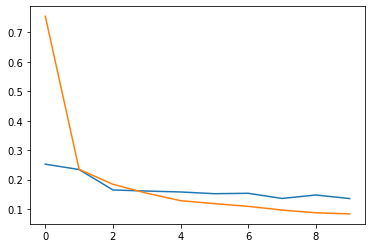

In [ ]:
history=hist.history
plt.plot(history['val_loss'])
plt.plot(history['loss'])

In [ ]:
model.evaluate(x_train, y_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0789 - accuracy: 0.9785


[0.07887451350688934, 0.9785166382789612]

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1446 - accuracy: 0.9636


[0.14456483721733093, 0.9635999798774719]

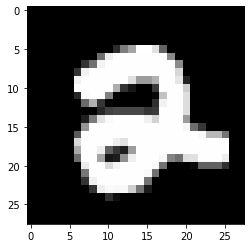

In [ ]:
plt.imshow(x_test[222].reshape(28,28), cmap='gray')

In [ ]:
model.predict(x_test[888].reshape(-1,784))

1/1 [==============================] - 0s 97ms/step


array([[3.2826761e-10, 2.6649911e-07, 9.9999869e-01, 6.6969187e-07,
        8.5167784e-09, 2.3972579e-11, 2.3534173e-14, 4.0698234e-07,
        4.9064059e-09, 3.4867319e-15]], dtype=float32)

In [ ]:
model.predict_classes(x_test[999].reshape(-1,784))

AttributeError: ignored

In [ ]:
np.argmax(model.predict(x_test), axis=-1)
print(y_test)

313/313 [==============================] - 1s 3ms/step
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
